In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sqlalchemy
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine, inspect, func

In [14]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [15]:
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [16]:
inspect = inspect(engine)
inspect.get_table_names()

['measurement', 'station']

In [17]:
# column details
columns = inspect.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(12)
date TEXT
prcp FLOAT
tobs FLOAT


In [18]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(0, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (1, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (2, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (3, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (4, 'USC00519397', '2010-01-06', 0.0, 73.0),
 (5, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (6, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (7, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (8, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (9, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [19]:
engine.execute("select * from measurement where date = '2017-05-16' ").fetchall()

[(2628, 'USC00519397', '2017-05-16', 0.01, 78.0),
 (5356, 'USC00513117', '2017-05-16', 0.03, 75.0),
 (7550, 'USC00514830', '2017-05-16', 0.05, 77.0),
 (12096, 'USC00519523', '2017-05-16', 0.0, 76.0),
 (14873, 'USC00519281', '2017-05-16', 0.03, 74.0),
 (19456, 'USC00516128', '2017-05-16', 0.3, 71.0)]

In [20]:
#to create class model of database tables
from sqlalchemy.ext.automap import automap_base
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station

In [21]:
# Query all tobs values
result = session.query(Measurement.tobs).all()

# Convert list of tuples into normal list
tobs_values = list(np.ravel(result))
tobs_values

[65.0,
 63.0,
 74.0,
 76.0,
 73.0,
 70.0,
 64.0,
 68.0,
 73.0,
 64.0,
 61.0,
 66.0,
 65.0,
 68.0,
 64.0,
 72.0,
 66.0,
 66.0,
 69.0,
 67.0,
 67.0,
 71.0,
 67.0,
 76.0,
 68.0,
 72.0,
 70.0,
 67.0,
 66.0,
 67.0,
 69.0,
 67.0,
 67.0,
 64.0,
 69.0,
 73.0,
 73.0,
 69.0,
 69.0,
 69.0,
 71.0,
 61.0,
 69.0,
 63.0,
 64.0,
 65.0,
 67.0,
 68.0,
 65.0,
 76.0,
 75.0,
 66.0,
 70.0,
 72.0,
 73.0,
 70.0,
 71.0,
 72.0,
 72.0,
 69.0,
 70.0,
 73.0,
 72.0,
 73.0,
 70.0,
 71.0,
 68.0,
 70.0,
 72.0,
 69.0,
 68.0,
 74.0,
 72.0,
 72.0,
 73.0,
 74.0,
 73.0,
 73.0,
 74.0,
 74.0,
 74.0,
 71.0,
 72.0,
 75.0,
 75.0,
 75.0,
 75.0,
 73.0,
 73.0,
 71.0,
 71.0,
 68.0,
 70.0,
 71.0,
 74.0,
 71.0,
 75.0,
 76.0,
 75.0,
 75.0,
 76.0,
 76.0,
 76.0,
 77.0,
 77.0,
 73.0,
 74.0,
 76.0,
 76.0,
 80.0,
 74.0,
 77.0,
 77.0,
 76.0,
 77.0,
 78.0,
 78.0,
 75.0,
 73.0,
 77.0,
 76.0,
 77.0,
 77.0,
 78.0,
 75.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 77.0,
 77.0,
 77.0,
 78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,

In [22]:
# precipitation of last 12 months
last_12_months_precipitation = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-22').order_by(Measurement.date).all()

In [23]:
# Set result to dataframe
df_last12months_precipitation = pd.DataFrame(data=last_12_months_precipitation)
df_last12months_precipitation.head(20)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.00
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28


In [24]:
df_last12months_precipitation = df_last12months_precipitation.set_index("date")
df_last12months_precipitation.head(20)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


In [25]:
df_last12months_precipitation = df_last12months_precipitation.sort_values(by=['date'])
df_last12months_precipitation.head(20)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,1.45
2016-08-24,2.15


#### Plot the temperature during previous year

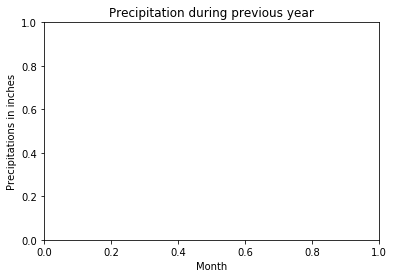

In [26]:
# Define labels
plt.title("Precipitation during previous year")
plt.xlabel("Month")
plt.ylabel("Precipitations in inches")

# Define months for tick labels on x-axis
months = ["Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]

# defining values of X and Y 
y = df_last12months_precipitation["prcp"].tolist()
x = np.arange(0, len(df_last12months_precipitation.index.tolist()), 1)

In [27]:
# Define X-tick labels (months) and their positioning
month_total = len(y)
month_step_ticks_x = int((month_total / 12)*1.03)
plt.ylim = max(y) + 1
tick_locations = [x+55 for x in range(1, month_total, month_step_ticks_x)]

([<matplotlib.axis.XTick at 0x17a9b512198>,
 <a list of 12 Text xticklabel objects>)

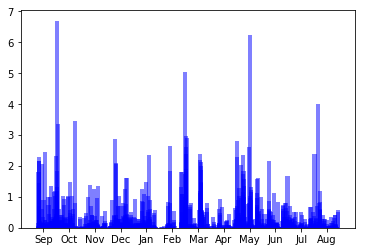

In [28]:
# Define plot
plt.bar(x, y, width=30, color="blue", alpha=0.5, align="edge")
plt.xticks(tick_locations, months)

In [29]:
plt.show()

### Station Analysis

#### Total number of stations

In [30]:
from sqlalchemy import func
# Total number of stations
totalnumber_of_stations = session.query(func.count(Station.station)).first()
print(f"Total number of stations: {str(totalnumber_of_stations[0])}")

Total number of stations: 9


#### Most active stations
- Design a query to find the most active stations.
- List the stations and observation counts in descending order
- Which station has the highest number of observations?

In [31]:
# Verifying measurement counts by station
engine.execute("SELECT count(station), station FROM measurement group by station ORDER BY count(station) DESC").fetchall()

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [32]:
# Query to find the most active stations
active_stations_descending_most2less = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

df_active_stations_descending_order = pd.DataFrame(data=active_stations_descending_most2less, columns=['Station', 'Count'])
df_active_stations_descending_order.head()

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [33]:
# station having highest number of observations to be stored in a variable
station_with_highest_observations = df_active_stations_descending_order["Station"][0]
highest_observations = df_active_stations_descending_order["Count"][0]
print(f"Station with highest observations ({highest_observations}): {station_with_highest_observations}")

Station with highest observations (2772): USC00519281


#### Design a query to retrieve the last 12 months of temperature observation data (tobs).
- Filter by the station with the highest number of observations.

In [34]:
# Querying temperature count for the previous year at the most active station
temperature_frequency = session.query(Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == station_with_highest_observations).\
    order_by(Measurement.tobs).all()
    
temperature_frequency

[(59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

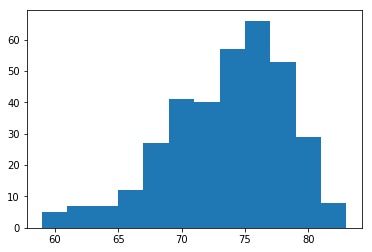

In [35]:
# Histogram from the above dataset.let us have 12 bins
hist, bins = np.histogram(temperature_frequency, bins=12)

# bar width is set to number of values between each bin
width = bins[1] - bins[0]

center = (bins[:-1] + bins[1:]) / 2

# Bar graph from the histogram data
plt.bar(center, hist, width=width)
plt.show()

### Temperature Analysis
- Build function to accept a start date and end date and return the minimum, average, and maximum temperatures for that range of dates.
- Call function to calculate the min, avg, and max temperatures for trip using the matching dates from the previous year (i.e. use "2017-01-01" if trip start date was "2018-01-01")
- Plot the min, avg, and max temperature from your previous query as a bar chart.
    - Use the average temperature as the bar height.
    - Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [53]:
def calculate_temps(start_date, end_date):
    """    
    Arguments details:
        start_date (string): Format %Y-%m-%d
        end_date (string): Format %Y-%m-%d
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
def last_yearDates(start_date, end_date):
    """ Dates counterpart from last year
    Arguments details:
        start_date (string): Format %Y-%m-%d
        end_date (string): Format %Y-%m-%d
   """
    lst_start_date = start_date.split('-')
    lst_end_date = end_date.split('-')
    lastyear_start_year = int(lst_start_date[0]) - 1
    lastyear_end_year = int(lst_end_date[0]) - 1
    last_year_start_date = f"{lastyear_start_year}-{lst_start_date[1]}-{lst_start_date[2]}"
    last_year_end_date = f"{lastyear_end_year}-{lst_end_date[1]}-{lst_end_date[2]}"
    
    return (last_year_start_date, last_year_end_date)

#### Call function to calculate the min, avg, and max temp for trip using the matching dates from the previous year

In [54]:
trip_start = '2016-05-11'
trip_end = '2016-05-23'

# Call function to return average temperatures for this date range
average_trip_temp = calculate_temps(trip_start, trip_end)

# Call function to grab dates from last year
(lastyear_start_date, lastyear_end_date) = last_yearDates(trip_start, trip_end)

#### Plot average temperature for trip dates

In [55]:
import seaborn 

# Define standard error max minus min temps
yerr_val = average_trip_temp[0][2] - average_trip_temp[0][0]

# Y value is the average temperature for the trip's date range; X is zero since we only need one bar
y = [average_trip_temp[0][1]]
x = 0

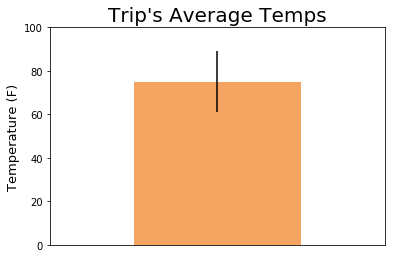

In [56]:
# Plot definition
fig, plot_inf = plt.subplots()
# Labels, title, ticks on axis
plot_inf.set_ylabel("Temperature (F)", fontsize=13)
plot_inf.set_title("Trip's Average Temps", fontsize=20)
plot_inf.bar(x, y, width=.1, color="sandybrown", yerr=yerr_val)
plot_inf.set_xlim(-.1, .1)
plot_inf.set_ylim(0, 100)
plot_inf.set_xbound(lower=-.1, upper=.1)
plot_inf.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off') 
plt.show()

#### Calculate the rainfall per weather station using date range from previous year

In [57]:
# For previous year dates calculate sum of all Precipaations for every station(weather) 
rainfall_by_station_previous_year = session.query(Measurement.station, func.sum(Measurement.prcp)).\
    filter(Measurement.date >= lastyear_start_date).\
    filter(Measurement.date <= lastyear_end_date).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()
rainfall_by_station_previous_year

[('USC00516128', 3.0300000000000002),
 ('USC00514830', 1.95),
 ('USC00519281', 1.7400000000000002),
 ('USC00519523', 1.49),
 ('USC00513117', 1.35),
 ('USC00519397', 0.21000000000000002),
 ('USC00511918', 0.0),
 ('USC00518838', 0.0)]

In [58]:
query = f"SELECT station, sum(prcp) from measurement where date >= '{lastyear_start_date}' AND date <= '{lastyear_end_date}' "\
            "group by station "\
            "order by sum(prcp) desc"
print(query)
engine.execute(query).fetchall()

SELECT station, sum(prcp) from measurement where date >= '2015-05-11' AND date <= '2015-05-23' group by station order by sum(prcp) desc


[('USC00516128', 3.0300000000000002),
 ('USC00514830', 1.95),
 ('USC00519281', 1.7400000000000002),
 ('USC00519523', 1.49),
 ('USC00513117', 1.35),
 ('USC00519397', 0.21000000000000002),
 ('USC00511918', 0.0),
 ('USC00518838', 0.0)]

In [61]:
# Calculating the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for a specific month and day over the years)

def daily_normals(date):
    """    
    Arguments:
        date (str): A date string in the format '%m-%d'
        
    Outs:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-02")

[(60.0, 69.39622641509433, 77.0)]

In [63]:
start_date = '2016-05-11'
end_date ='2016-05-23'
# Range of dates between start and end dates
dates = session.query(Measurement.date).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.date).all()

# List from the dates above 
my_tripDates = [x[0] for x in dates]

# Another list by stripping off %m-%d 
my_tripDates_stripped= [x[5:] for x in my_tripDates]

# Start month,day and end month,day 
start_month_day = my_tripDates_stripped[0]
end_month_day = my_tripDates_stripped[-1]
    
# Calculate the normals for each date using the stripped list   
trips_daily_normals = [session.query(func.min(Measurement.tobs),
                       func.avg(Measurement.tobs),
                       func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) >= start_month_day).filter(func.strftime("%m-%d", Measurement.date) <= end_month_day).group_by(func.strftime("%m-%d", Measurement.date)).all()]

trips_daily_normals = trips_daily_normals[0]
print("Agg Daily Normals during 05-11 to 05-23")
trips_daily_normals

Agg Daily Normals during 05-11 to 05-23


[(65.0, 73.61111111111111, 79.0),
 (65.0, 73.13793103448276, 79.0),
 (67.0, 73.14285714285714, 79.0),
 (63.0, 73.89285714285714, 80.0),
 (63.0, 73.69090909090909, 79.0),
 (68.0, 74.37931034482759, 80.0),
 (68.0, 74.45, 79.0),
 (68.0, 74.10714285714286, 82.0),
 (65.0, 73.80701754385964, 79.0),
 (68.0, 73.89655172413794, 79.0),
 (64.0, 72.96428571428571, 80.0),
 (64.0, 74.45614035087719, 80.0),
 (68.0, 74.94827586206897, 87.0)]

In [65]:
# Create a dataframe from the previous query 
dataframe_trips_daily_normals= pd.DataFrame(trips_daily_normals,columns=['tmin', 'tavg', 'tmax'])
# Add my_tripDates calculated above to it
dataframe_trips_daily_normals['date']= my_tripDates
# to have date as x axis title let us convert the date column datetime
daily_normals_df['date'] = pd.to_datetime(dataframe_trips_daily_normals['date'], format='%Y-%m-%d')
# date in the dataframe is made index here
dataframe_trips_daily_normals.set_index('date',inplace=True)
dataframe_trips_daily_normals

,tmin,tavg,tmax
date,,,
2016-05-11,65.0,73.611111,79.0
2016-05-12,65.0,73.137931,79.0
2016-05-13,67.0,73.142857,79.0
2016-05-14,63.0,73.892857,80.0
2016-05-15,63.0,73.690909,79.0
2016-05-16,68.0,74.379310,80.0
2016-05-17,68.0,74.450000,79.0
2016-05-18,68.0,74.107143,82.0
2016-05-19,65.0,73.807018,79.0


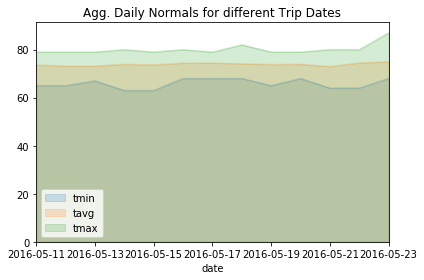

In [72]:
# Daily normals plotting as area plot with `stacked=False`
dataframe_trips_daily_normals.plot(kind='area', alpha=.2, stacked=False, x_compat=True, title="Agg. Daily Normals for different Trip Dates")
plt.tight_layout()
plt.savefig("my_Trip_DailyNormals.png")
plt.show()